This program implements an SVM classification method on the ALFA's Global Locations dataset to develop a Fault Detector and design a sliding window to improve the detector's output stability.

In [1]:
import pandas as pd                        
import numpy  as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as mplt


Global = pd.read_excel('Global_dataset.xlsx')     # Importing dataset.
Global


,time,field_header_seq,field_header_stamp,field_status_status,field_status_service,field_latitude,field_longitude,field_altitude,field_position_covariance0,field_position_covariance1,field_position_covariance2,field_position_covariance3,field_position_covariance4,field_position_covariance5,field_position_covariance6,field_position_covariance7,field_position_covariance8,field_position_covariance_type,fault resault
0,1536689966609720064,5447,1536689966608250112,0,1,40.591424,-79.899018,374.872723,0.6724,0,0,0,0.6724,0,0,0,2.6896,1,0
1,1536689966835180032,5448,1536689966833600000,0,1,40.591426,-79.899071,374.932668,0.6724,0,0,0,0.6724,0,0,0,2.6896,1,0
2,1536689967072649984,5449,1536689967072000000,0,1,40.591429,-79.899128,374.992608,0.6724,0,0,0,0.6724,0,0,0,2.6896,1,0
3,1536689967344339968,5450,1536689967343810048,0,1,40.591435,-79.899194,375.072539,0.7225,0,0,0,0.7225,0,0,0,2.8900,1,0
4,1536689967595360000,5451,1536689967593440000,0,1,40.591444,-79.899249,375.162479,0.6724,0,0,0,0.6724,0,0,0,2.6896,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1536690511732730112,7727,1536690511732000000,0,1,40.590797,-79.896551,346.105511,0.5476,0,0,0,0.5476,0,0,0,2.1904,1,1
856,1536690511955749888,7728,1536690511954990080,0,1,40.590790,-79.896587,345.165478,0.5476,0,0,0,0.5476,0,0,0,2.1904,1,1
857,1536690512234070016,7729,1536690512232839936,0,1,40.590782,-79.896626,344.175441,0.5476,0,0,0,0.5476,0,0,0,2.1904,1,1
858,1536690512496359936,7730,1536690512487460096,0,1,40.590776,-79.896662,343.295406,0.5476,0,0,0,0.5476,0,0,0,2.1904,1,1


In [2]:
Global.field_latitude.describe()

count    860.000000
mean      40.592105
std        0.000866
min       40.590762
25%       40.591344
50%       40.592070
75%       40.593106
max       40.593277
Name: field_latitude, dtype: float64

In [3]:
Global.field_position_covariance0.describe()

count    860.000000
mean       0.569161
std        0.047027
min        0.547600
25%        0.547600
50%        0.547600
75%        0.547600
max        0.722500
Name: field_position_covariance0, dtype: float64

In [4]:
Global.field_longitude.describe()

count    860.000000
mean     -79.898412
std        0.001665
min      -79.901041
25%      -79.899698
50%      -79.898645
75%      -79.896698
max      -79.895875
Name: field_longitude, dtype: float64

In [5]:
Global.field_position_covariance4.describe()

count    860.000000
mean       0.569161
std        0.047027
min        0.547600
25%        0.547600
50%        0.547600
75%        0.547600
max        0.722500
Name: field_position_covariance4, dtype: float64

In [6]:
Global.field_altitude.describe()

count    860.000000
mean     365.361109
std        7.288007
min      342.395368
25%      361.606476
50%      362.847070
75%      367.072278
max      399.422839
Name: field_altitude, dtype: float64

In [7]:
Global.field_position_covariance8.describe()

count    860.000000
mean       2.276643
std        0.188106
min        2.190400
25%        2.190400
50%        2.190400
75%        2.190400
max        2.890000
Name: field_position_covariance8, dtype: float64

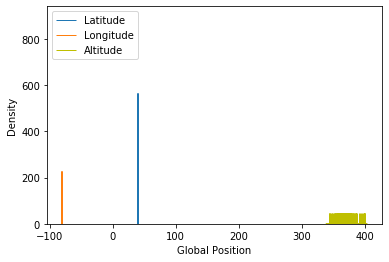

In [8]:
# Data Description.
import seaborn as sns                      
import matplotlib.pyplot as plt
ax = sns.distplot(Global.field_latitude, rug=True)
#ax = sns.distplot(Global.field_position_covariance0, rug=True)

ax = sns.distplot(Global.field_longitude, rug=True)
#ax = sns.distplot(Global.field_position_covariance4, rug=True)

ax = sns.distplot(Global.field_altitude, rug=True, color="y")
#ax = sns.distplot(Global.field_position_covariance8, rug=True)

ax.set( xlabel='Global Position',ylabel='Density')#xlabel='Compass Angel',
plt.legend( loc='upper left', labels=['Latitude', 'Longitude','Altitude'])
ax.figure.savefig("output2.png")

In [9]:
cols_to_use = ['time', 'field_header_seq', 'field_header_stamp', 'field_status_status', 'field_status_service','field_latitude','field_longitude','field_altitude','field_position_covariance0','field_position_covariance1','field_position_covariance2','field_position_covariance3','field_position_covariance4','field_position_covariance5','field_position_covariance6','field_position_covariance7','field_position_covariance8','field_position_covariance_type']
X = Global[cols_to_use]
y = Global['fault resault']
y

0      0
1      0
2      0
3      0
4      0
      ..
855    1
856    1
857    1
858    1
859    1
Name: fault resault, Length: 860, dtype: int64

In [10]:
 # Separating Train and Test Data.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)
X_valid

,time,field_header_seq,field_header_stamp,field_status_status,field_status_service,field_latitude,field_longitude,field_altitude,field_position_covariance0,field_position_covariance1,field_position_covariance2,field_position_covariance3,field_position_covariance4,field_position_covariance5,field_position_covariance6,field_position_covariance7,field_position_covariance8,field_position_covariance_type
145,1536690271021659904,6736,1536690271017999872,0,1,40.591620,-79.898373,385.273300,0.5476,0,0,0,0.5476,0,0,0,2.1904,1
204,1536690285541410048,6795,1536690285539190016,0,1,40.593275,-79.899542,362.671425,0.5476,0,0,0,0.5476,0,0,0,2.1904,1
271,1536690301962279936,6862,1536690301959980032,0,1,40.592979,-79.896089,359.895072,0.5476,0,0,0,0.5476,0,0,0,2.1904,1
258,1536690298768329984,6849,1536690298767439872,0,1,40.593123,-79.896732,361.324354,0.5476,0,0,0,0.5476,0,0,0,2.1904,1
530,1536690365264110080,7121,1536690365263249920,0,1,40.593136,-79.897346,362.893721,0.5476,0,0,0,0.5476,0,0,0,2.1904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1536689990115699968,5544,1536689990114739968,0,1,40.591721,-79.899373,376.192237,0.6724,0,0,0,0.6724,0,0,0,2.6896,1
846,1536690509531279872,7718,1536690509530510080,0,1,40.590900,-79.896263,354.575763,0.5476,0,0,0,0.5476,0,0,0,2.1904,1
334,1536690317423069952,6925,1536690317421989888,0,1,40.590802,-79.896965,367.115085,0.5476,0,0,0,0.5476,0,0,0,2.1904,1
261,1536690299569530112,6852,1536690299568659968,0,1,40.593121,-79.896564,361.434526,0.5476,0,0,0,0.5476,0,0,0,2.1904,1


In [11]:
X_valid.shape

(258, 18)

In [12]:
# Calculating the standard deviation and mean of each feature.
m1 = X_valid.time.mean()
s1 = X_valid.time.std()

m2 = X_valid.field_header_seq.mean()
s2 = X_valid.field_header_seq.std()

m3 = X_valid.field_header_stamp.mean()
s3 = X_valid.field_header_stamp.std()

m4 = X_valid.field_status_status.mean()
s4 = X_valid.field_status_status.std()

m5 = X_valid.field_status_service.mean()
s5 = X_valid.field_status_service.std()

m6 = X_valid.field_latitude.mean()
s6 = X_valid.field_latitude.std()

m7 = X_valid.field_longitude.mean()
s7 = X_valid.field_longitude.std()

m8 = X_valid.field_altitude.mean()
s8 = X_valid.field_altitude.std()

m9 = X_valid.field_position_covariance0.mean()
s9 = X_valid.field_position_covariance0.std()

m10 = X_valid.field_position_covariance1.mean()
s10 = X_valid.field_position_covariance1.std()

m11 = X_valid.field_position_covariance2.mean()
s11 = X_valid.field_position_covariance2.std()

m12 = X_valid.field_position_covariance3.mean()
s12 = X_valid.field_position_covariance3.std()

m13 = X_valid.field_position_covariance4.mean()
s13 = X_valid.field_position_covariance4.std()

m14 = X_valid.field_position_covariance5.mean()
s14 = X_valid.field_position_covariance5.std()

m15 = X_valid.field_position_covariance6.mean()
s15 = X_valid.field_position_covariance6.std()

m16 = X_valid.field_position_covariance7.mean()
s16 = X_valid.field_position_covariance7.std()

m17 = X_valid.field_position_covariance8.mean()
s17 = X_valid.field_position_covariance8.std()

m18 = X_valid.field_position_covariance_type.mean()
s18 = X_valid.field_position_covariance_type.std()

m18


1.0

In [13]:
X_valid[cols_to_use[1]]

145    6736
204    6795
271    6862
258    6849
530    7121
       ... 
97     5544
846    7718
334    6925
261    6852
824    7696
Name: field_header_seq, Length: 258, dtype: int64

In [14]:
 # Preparing random noise based on standard deviation and mean of each feature.
r1 =0.1* np.random.normal(m1,s1, X_valid[cols_to_use[0]].shape)
r2 =0.1* np.random.normal(m2,s2, X_valid[cols_to_use[1]].shape)
r3 =0.1* np.random.normal(m3,s3, X_valid[cols_to_use[2]].shape)
r4 =0.1* np.random.normal(m4,s4, X_valid[cols_to_use[3]].shape)
r5 = 0.1*np.random.normal(m5,s5, X_valid[cols_to_use[4]].shape)
r6 =0.1* np.random.normal(m6,s6, X_valid[cols_to_use[5]].shape)
r7 = 0.1*np.random.normal(m7,s7, X_valid[cols_to_use[6]].shape)
r8 = 0.1*np.random.normal(m8,s8, X_valid[cols_to_use[7]].shape)
r9 = 0.1*np.random.normal(m9,s9, X_valid[cols_to_use[8]].shape)
#r10 = np.random.normal(m10,s10 X_valid[cols_to_use[9]].shape)
r11 = 0.1*np.random.normal(m11,s11, X_valid[cols_to_use[10]].shape)
r12 = 0.1*np.random.normal(m12,s12, X_valid[cols_to_use[11]].shape)
r13 =0.1* np.random.normal(m13,s13, X_valid[cols_to_use[12]].shape)
r14 =0.1* np.random.normal(m14,s14, X_valid[cols_to_use[13]].shape)
r15 =0.1* np.random.normal(m15,s15, X_valid[cols_to_use[14]].shape)
r16 =0.1* np.random.normal(m16,s16, X_valid[cols_to_use[15]].shape)
r17 =0.1* np.random.normal(m17,s17, X_valid[cols_to_use[16]].shape)
r18 =0.1* np.random.normal(m18,s18, X_valid[cols_to_use[17]].shape)


f = [r1,r2,r3,r4,r5,r6,r7,r8,r9,r11,r11,r12,r13,r14,r15,r16,r17,r18]
random_noise = np.transpose(f)
random_noise

array([[1.53669021e+17, 7.62679820e+02, 1.53669021e+17, ...,
        0.00000000e+00, 2.43942950e-01, 1.00000000e-01],
       [1.53669045e+17, 6.62958999e+02, 1.53669003e+17, ...,
        0.00000000e+00, 2.24138659e-01, 1.00000000e-01],
       [1.53669033e+17, 7.42647137e+02, 1.53669042e+17, ...,
        0.00000000e+00, 2.33309935e-01, 1.00000000e-01],
       ...,
       [1.53669022e+17, 5.73796007e+02, 1.53669034e+17, ...,
        0.00000000e+00, 2.09638195e-01, 1.00000000e-01],
       [1.53669029e+17, 8.47504943e+02, 1.53669034e+17, ...,
        0.00000000e+00, 1.89472707e-01, 1.00000000e-01],
       [1.53669021e+17, 7.70169032e+02, 1.53669023e+17, ...,
        0.00000000e+00, 2.02476483e-01, 1.00000000e-01]])

In [15]:
random_noise.shape

(258, 18)

In [16]:
 # Adding random noise to data.
X_test = X_valid + random_noise
X_test

,time,field_header_seq,field_header_stamp,field_status_status,field_status_service,field_latitude,field_longitude,field_altitude,field_position_covariance0,field_position_covariance1,field_position_covariance2,field_position_covariance3,field_position_covariance4,field_position_covariance5,field_position_covariance6,field_position_covariance7,field_position_covariance8,field_position_covariance_type
145,1.690359e+18,7498.679820,1.690359e+18,0.0,1.1,44.650849,-87.887974,421.373122,0.603336,0.0,0.0,0.0,0.613368,0.0,0.0,0.0,2.434343,1.1
204,1.690359e+18,7457.958999,1.690359e+18,0.0,1.1,44.652654,-87.889554,399.191861,0.608968,0.0,0.0,0.0,0.602233,0.0,0.0,0.0,2.414539,1.1
271,1.690359e+18,7604.647137,1.690359e+18,0.0,1.1,44.652115,-87.885777,397.544277,0.604905,0.0,0.0,0.0,0.603188,0.0,0.0,0.0,2.423710,1.1
258,1.690359e+18,7482.274567,1.690359e+18,0.0,1.1,44.652274,-87.886673,398.806385,0.602097,0.0,0.0,0.0,0.609666,0.0,0.0,0.0,2.414062,1.1
530,1.690359e+18,7677.734711,1.690359e+18,0.0,1.1,44.652390,-87.887376,398.578389,0.608963,0.0,0.0,0.0,0.609719,0.0,0.0,0.0,2.418864,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.690359e+18,6095.521905,1.690359e+18,0.0,1.1,44.650967,-87.889358,412.459854,0.723994,0.0,0.0,0.0,0.724633,0.0,0.0,0.0,2.920584,1.1
846,1.690360e+18,8395.915172,1.690360e+18,0.0,1.1,44.650104,-87.886389,389.858405,0.602221,0.0,0.0,0.0,0.599385,0.0,0.0,0.0,2.433325,1.1
334,1.690359e+18,7498.796007,1.690359e+18,0.0,1.1,44.649863,-87.886930,403.007864,0.600119,0.0,0.0,0.0,0.604518,0.0,0.0,0.0,2.400038,1.1
261,1.690359e+18,7699.504943,1.690359e+18,0.0,1.1,44.652465,-87.886400,398.467775,0.594654,0.0,0.0,0.0,0.607432,0.0,0.0,0.0,2.379873,1.1


In [17]:
# Implementing min-max scaling for test dataset preprocessing.
minmax_scalextest = preprocessing.MinMaxScaler().fit(X_test)
X_test_minmax = minmax_scalextest.transform(X_test)
X_test_minmax

array([[0.53252474, 0.58546261, 0.53420976, ..., 0.        , 0.10933812,
        0.        ],
       [0.59681103, 0.56940396, 0.52837278, ..., 0.        , 0.07504938,
        0.        ],
       [0.60440169, 0.62725183, 0.62149718, ..., 0.        , 0.09092834,
        0.        ],
       ...,
       [0.61054592, 0.58550843, 0.63452221, ..., 0.        , 0.04994357,
        0.        ],
       [0.59267792, 0.66465991, 0.60395293, ..., 0.        , 0.01502945,
        0.        ],
       [0.92203723, 0.96700119, 0.93293134, ..., 0.        , 0.03754392,
        0.        ]])

In [18]:
# Implementing min-max scaling for train dataset preprocessing.
minmax_scalextrain = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scalextrain.transform(X_train)


In [19]:
 # Implementing the SVM Classiffier.
clf = svm.SVC(kernel='rbf')

clf.fit(X_train_minmax, y_train)
y_pred = clf.predict(X_test_minmax)
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.9031007751937985


In [24]:
# Collecting the confusion matrix.
from sklearn.metrics import confusion_matrix   
cm = confusion_matrix(y_valid,y_pred)
cm

array([[ 46,  25],
       [  0, 187]], dtype=int64)

In [25]:
# Collecting the Classification Report.
from sklearn.metrics import classification_report
classification_report(y_valid,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.65      0.79        71\n           1       0.88      1.00      0.94       187\n\n    accuracy                           0.90       258\n   macro avg       0.94      0.82      0.86       258\nweighted avg       0.91      0.90      0.90       258\n'

'              precision    recall  f1-score   support\n\n
           0       1.00      0.65      0.79        71\n
           1       0.88      1.00      0.94       187\n\n
    accuracy                           0.90       258\n   
   macro avg       0.94      0.82      0.86       258\n
weighted avg       0.91      0.90      0.90       258\n'


              Precision  Recall  F1-Score
0                  1.00    0.65      0.79
1                  0.88    1.00      0.94
Macro-Avg          0.94    0.82      0.86
Weighted-Avg       0.91    0.90      0.90


[Text(33.0, 0.5, 'Metrics')]

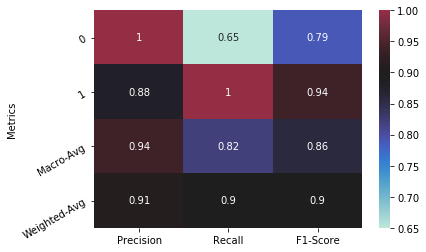

In [45]:
# Plotting the Classification Report.
import pandas as pd
datas = {'Precision':[1.00,0.88,0.94,0.91],'Recall':[0.65,1.00,0.82,0.90],
         'F1-Score':[0.79,0.94,0.86,0.90]}
Indexes=['0','1','Macro-Avg','Weighted-Avg']
rt = pd.DataFrame(datas, index=Indexes)
print(rt)

p1=sns.heatmap(rt, annot=True,center=0.9)
p1.set_yticklabels(p1.get_yticklabels(),rotation = 30)
p1.set( ylabel='Metrics')


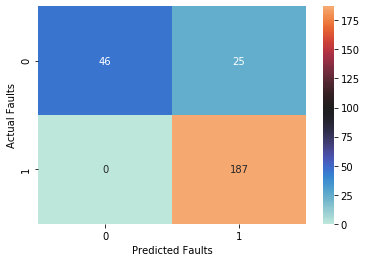

In [32]:
# Plotting the Confusion Matrix.
import seaborn as sns
ax = sns.heatmap(cm, annot=True,fmt="d", center=100)
ax.set(xlabel='Predicted Faults', ylabel='Actual Faults')
ax.figure.savefig("Confusion_Matrix_Global_Dataset.png")

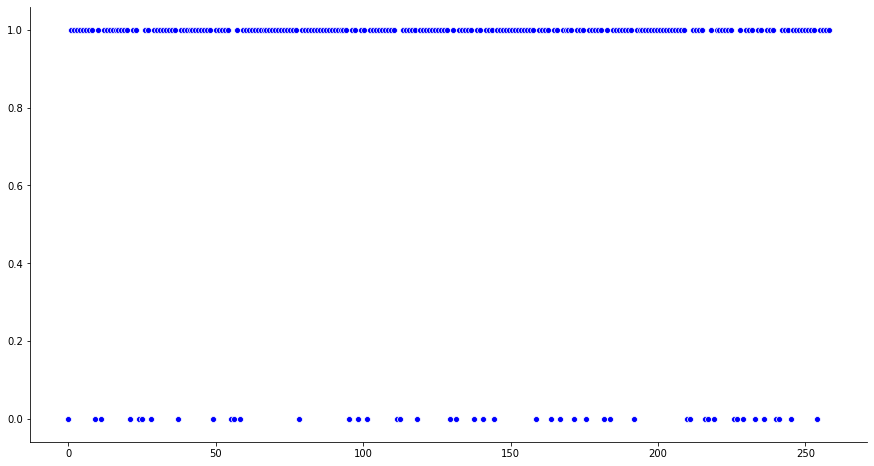

In [83]:
# Plotting the Predicted Output.
import numpy as np
x = np.linspace(0,258,258)
plt.figure(figsize = (15,8))
sns.scatterplot(x, y_pred, color='b')
sns.despine()

In [84]:
# Developing Functions of the Window.
def vectorized_stride_v1(array, clearing_time_index, max_time, sub_window_size,
                         stride_size):       
    start = clearing_time_index + 1 - sub_window_size + 1
    
    sub_windows = (
        start + 
        np.expand_dims(np.arange(sub_window_size), 0) +
        np.expand_dims(np.arange(max_time + 1), 0).T
    )
    
    # Fancy indexing to select every V rows.
    return array[sub_windows[::stride_size]]


def vectorized_stride_v2(array, clearing_time_index, max_time, sub_window_size,
                         stride_size):
    start = clearing_time_index + 1 - sub_window_size + 1
    
    sub_windows = (
        start + 
        np.expand_dims(np.arange(sub_window_size), 0) +
        # Create a rightmost vector as [0, V, 2V, ...].
        np.expand_dims(np.arange(max_time + 1, step=stride_size), 0).T
    )
    
    return array[sub_windows]

In [104]:
# Starting  to implement the Sliding Window over the Output.
z1 = vectorized_stride_v2(y_pred, 1, 257, 5,3)
z1

array([[1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 0, 1],
       [0, 1, 1, 0, 1],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1],
       [1, 1, 1,

In [105]:
az = z1.shape
bz = az[0] -1
bz

85

In [106]:
m = np.zeros(bz +1)
m.shape

(86,)

In [107]:
# The Final Step of Sliding Window implementation.
for i in range(0,bz,1):
    er = z1[i]
    ew = np.sum(er)
    
    if ew>2:
        m[i]=1
    else:
        m[i]=0
        
    print(m)

    

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [108]:
m.size

86

In [109]:
np.sum(m)

83.0

In [120]:
m2 = np.zeros(258)
m2.shape

(258,)

In [121]:
# Changing the Sliding Parameters for optimizing the results.
for i in range(0,85,1):
    r1 = i*3
    r2 = r1+4
    for k in range(r1,r2,1):
        m2[k]=m[i]
        

In [122]:
m2.shape

(258,)

In [123]:
np.sum(m2)

250.0

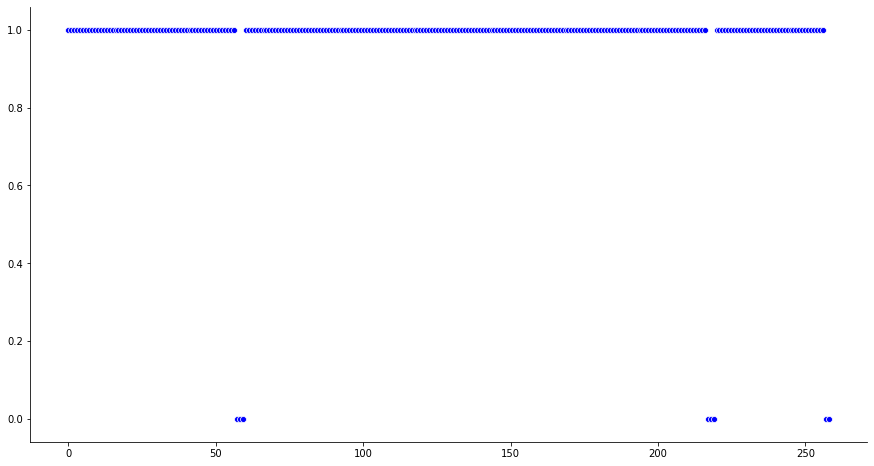

In [125]:
x = np.linspace(0,258,258)
plt.figure(figsize = (15,8))
sns.scatterplot(x, m2,color='b')
sns.despine()

In [126]:
print("Accuracy:",metrics.accuracy_score(y_valid, m2))

Accuracy: 0.7248062015503876


In [131]:
# Changing the Sliding Parameters for optimizing the results.
z2 = vectorized_stride_v2(y_pred, 1, 255, 5,1)
z2

array([[1, 1, 0, 1, 1],
       [1, 0, 1, 1, 1],
       [0, 1, 1, 1, 1],
       ...,
       [1, 1, 0, 1, 1],
       [1, 0, 1, 1, 1],
       [0, 1, 1, 1, 1]], dtype=int64)

In [132]:
az4 = z2.shape
bz4 = az4[0] -1
bz4

255

In [133]:
m3 = np.zeros(bz4 +1)
m3.shape

(256,)

In [134]:
for i in range(0,bz4,1):
    er = z2[i]
    ew = np.sum(er)
    
    if ew>2:
        m3[i]=1
    else:
        m3[i]=0
        


In [135]:
m3

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [136]:
m4 = np.zeros(258)
m4.shape

(258,)

In [137]:
# Another Changing the Sliding Parameters for optimizing the results.

for i in range(0,85,1):
    r1 = i*1
    r2 = r1+4
    for k in range(r1,r2,1):
        m4[k]=m[i]
        

In [140]:
np.sum(m4)

86.0

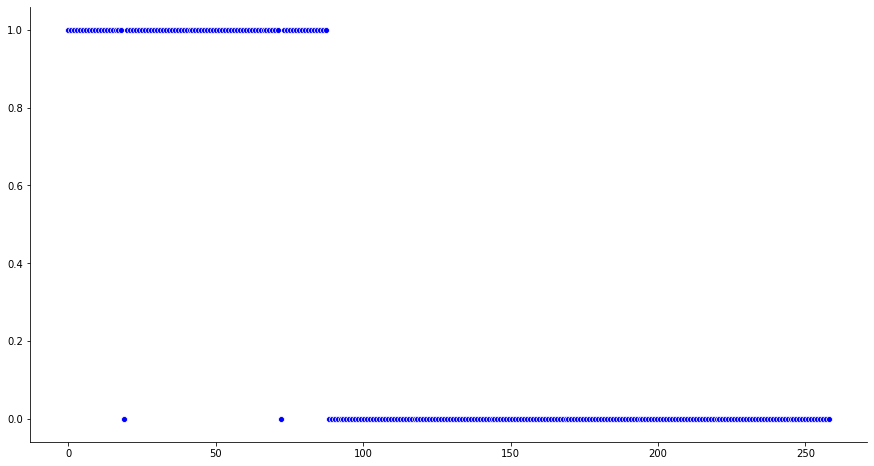

In [142]:
x = np.linspace(0,258,258)
plt.figure(figsize = (15,8))
sns.scatterplot(x, m4,color='b')
sns.despine()

In [143]:
print("Accuracy:",metrics.accuracy_score(y_valid, m4))

Accuracy: 0.44573643410852715
